In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def m_rungekutta4(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    for i in range(1,len(y)):
  
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
    return(y)

In [3]:
# pendulo amortiguado con fuerza externa y friccion.
    # Input:
    # t: tiempo
    # y: vector del péndulo [ángulo, vel angular] 
    # args['alpha']: g/l_pendulo
    # args['beta']: fr/m_pendulo
    # args['gamma']: F_ext/(m_pendulo*l_pendulo)
    # args['omega']: freq_ext
# Output: dydt, arreglo de solución

def pendulo(t,y,args):
    dydt = zeros(2)
    
    dydt[0] = y[1] #primera ecuación
    dydt[1] = -args['alpha']*sin(y[0]) - args['beta']*y[1] + args['gamma']*cos(args['omega']*t)
    return dydt
    

In [4]:
#parámetros
g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 0. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 200 # n_puntos

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo



In [5]:
# definir los argumentos
args_sol = {}
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = freq_ext




In [6]:
# Condiciones Iniciales
# angulos pequeños
theta_0 = pi/16
w_0 = 0
c_i = array([theta_0,w_0])

In [7]:
y = m_rungekutta4(pendulo, c_i, t, args_sol)
# solución analítica
# x peq, ==> sin(x)~x.  y = theta0*cos(sqrt(alpha)*t)
y_theta_peq = theta_0 * cos(sqrt(args_sol['alpha'])*t)



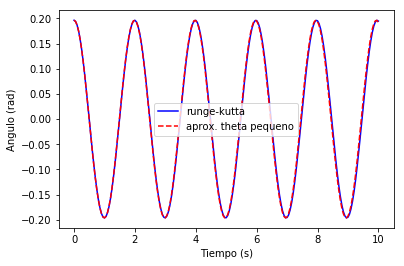

In [8]:
# Grafique la dinámica
plt.plot(t, y[:,0], c='b', label='runge-kutta')
plt.plot(t, y_theta_peq, 'r--', label='aprox. theta pequeno')
plt.xlabel('Tiempo (s)')
plt.ylabel('Angulo (rad)')
plt.legend(loc='best')

In [9]:
def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:int(N/2)]*2*pi, abs(y_fft[:int(N/2)]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')

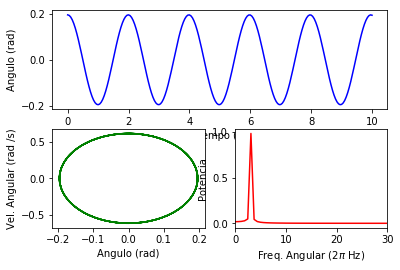

In [10]:
graficar_fase_pendulo(t,y)

In [11]:
fr = 0.8 #kg/(m*s)
args_sol['beta'] = fr/m_pendulo
y = m_rungekutta4(pendulo, c_i, t, args_sol)

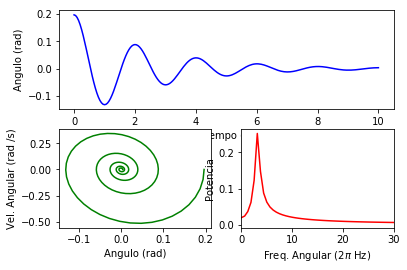

In [12]:
graficar_fase_pendulo(t,y)

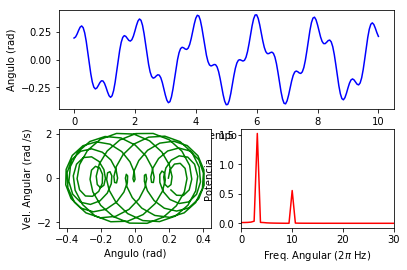

In [13]:
fr = 0 #kg/(m*s)
F_ext = 10 #N
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = 10 # (2pi/s)

y = m_rungekutta4(pendulo, c_i, t, args_sol)
graficar_fase_pendulo(t,y)

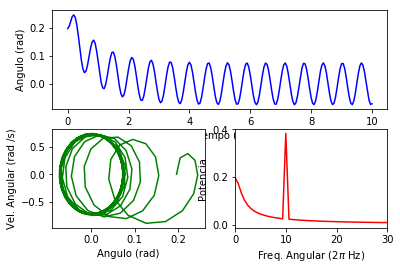

In [14]:
fr = 10 #kg/(m*s)
F_ext = 10 #N
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = 10 # (2pi/s)

y = m_rungekutta4(pendulo, c_i, t, args_sol)
graficar_fase_pendulo(t,y)

# Now we'll make this stochastic

In [15]:
h = t[1]-t[0]
def pendulo2(t,y,args):
    dydt = zeros(2)
    
    dydt[0] = y[1] #primera ecuación
    dydt[1] = -args['alpha']*sin(y[0]) - args['beta']*y[1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))
    return dydt
    

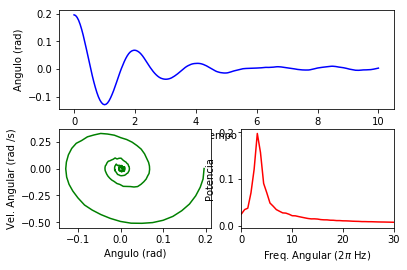

In [16]:
fr = 1 #kg/(m*s)
F_ext = 0 #N
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1
args_sol['omega'] = 10 # (2pi/s)

y = m_rungekutta4(pendulo2, c_i, t, args_sol)
graficar_fase_pendulo(t,y)
    

# Now, we'll Make this interacting

In [17]:
# Condiciones Iniciales
# angulos pequeños
theta_01 = pi/16
w_01 = 1
theta_02 = -pi/16
w_02 = -1
c_i_mult = array([theta_01,w_01,theta_02,w_02])

g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 2000 # n_puntos

t = linspace(0., 100., N+1) # [s] arreglo de n_puntos en el tiempo



In [18]:
h = t[1]-t[0]
def pendulo3(t,y,args):
    dydt = zeros(4)
    
    dydt[0] = y[1] #primera ecuación
    dydt[1] = -args['alpha']*sin((y[0]-y[2])) - args['beta']*y[1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))
    dydt[2] = y[3] #primera ecuación
    dydt[3] = -args['alpha']*sin((y[2]-y[0])) - args['beta']*y[3] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt
    

In [19]:
def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle 1
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.plot(t, y[:,2], c='b',ls='--')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.plot(y[:,2], y[:,3], c='g',ls='--')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:int(N/2)]*2*pi, abs(y_fft[:int(N/2)]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')
    
   

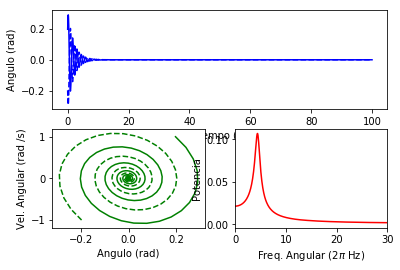

In [20]:
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 0
args_sol['omega'] = 0

y = m_rungekutta4(pendulo3, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)
    

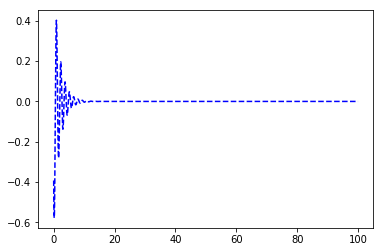

In [21]:

plot(t, y[:,2]-y[:,0], c='b',ls='--')


# Now we make an N body stochastic simmulation

In [22]:
# Condiciones Iniciales
# angulos pequeños
M=20
c_i_mult = np.zeros(2*M)
X_loc=0
X_scale=1
V_loc=3
V_scale=1
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = V_loc, scale = V_scale)
'''

theta_01 = pi/16
w_01 = 1
theta_02 = -pi/16
w_02 = -1
c_i_mult = array([theta_01,w_01,theta_02,w_02])
'''
g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 2000 # n_puntos

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo


In [23]:
def force(y1,y2,v1,v2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def force2(y1,y2,v1,v2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*exp(-((y1-y2)/rangei)**2) 


def pairF(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2(y[i],y[j],y[i+1],y[j+1],t)
    return F
        
def extF(yi,t):
    return sin(yi)
    

In [24]:
h = t[1]-t[0]
def pendulo4(t,y,args):
    dydt = np.zeros(2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        dydt[i+1] = args['alpha']*pairF(i,y,t) + args['alpha']*extF(y[i],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

    return dydt 

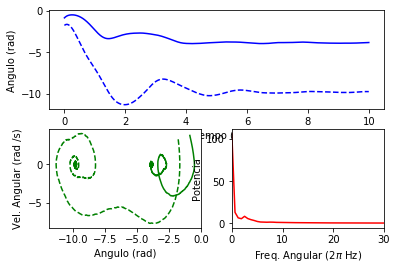

In [25]:
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 100
args_sol['omega'] = 0

y = m_rungekutta4(pendulo4, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)


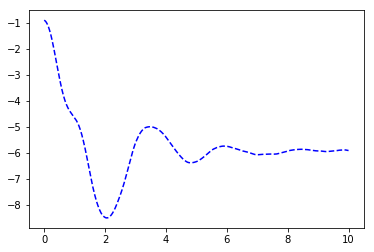

In [26]:
plot(t, y[:,2]-y[:,0], c='b',ls='--')

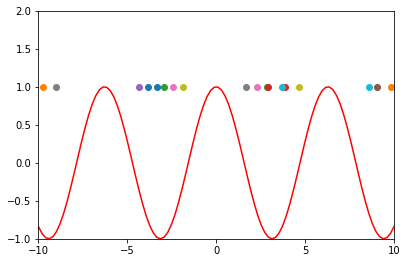

In [27]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-10,10))
ax.set_ylim((-1,2))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-10,10,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate
line20, = ax.plot([], [],'r')
plt.tight_layout()

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j]/y[5*i,2*j])



    x20 =  theta
    y20 =  cos(theta)
    line20.set_data(x20, y20)

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('Evol1D.gif', writer='imagemagick', fps=24)

# Now we will make this into a 2D system

In [28]:
# Condiciones Iniciales
# angulos pequeños
M=20
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


X_loc=0
X_scale=1
VX_loc=3
VX_scale=1
Y_loc=0
Y_scale=1
VY_loc=3
VY_scale=1
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)
'''

theta_01 = pi/16
w_01 = 1
theta_02 = -pi/16
w_02 = -1
c_i_mult = array([theta_01,w_01,theta_02,w_02])
'''
g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 2000 # n_puntos

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo

In [29]:

def forceX(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def forceY(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -sin((w1-w2))

def force2X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*exp(-((y1-y2)/rangei)**2-((w1-w2)/rangei)**2)

def force2Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((w1-w2)/rangei)*exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 


def force3X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (y1-y2)/((y1-y2)**2+(w1-w2)**2)

def force3Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (w1-w2)/((y1-y2)**2+(w1-w2)**2)


def pairFX(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force3X(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFY(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force3Y(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return sin(yi)

def extFY(yi,wi,t):
    return sin(wi)

In [30]:
h = t[1]-t[0]
def pendulo5(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        dydt[i+1] = args['alpha']*pairFX(i,y,t) + args['alpha']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        dydt[i+1+2*M] = args['alpha']*pairFY(i,y,t) + args['alpha']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 

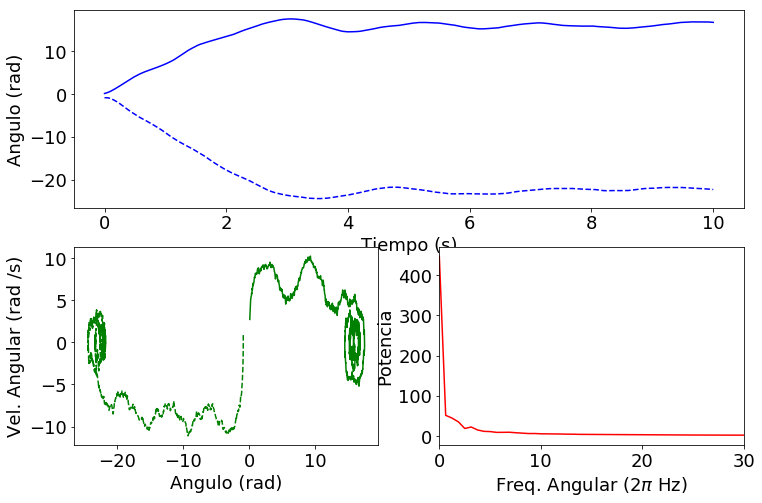

In [31]:
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1000
args_sol['omega'] = 0

y = m_rungekutta4(pendulo5, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)

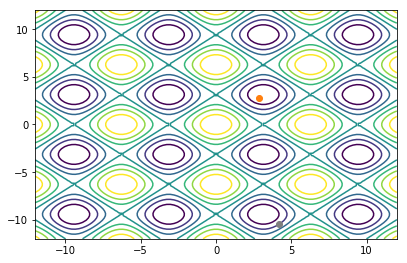

In [32]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-12,12))
ax.set_ylim((-12,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-12,12,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate
line20, = ax.plot([], [],'r')
(xx,yy)=meshgrid(theta,theta)
ax.contour(xx,yy,cos(xx)+cos(yy)) 
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])

    
    '''
    x20 =  theta
    y20 =  cos(theta)
    line20.set_data(x20, y20)
    '''

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('Evol2d_noise_inter_log.gif', writer='imagemagick', fps=24)

# Now we want to implement Reflecting boundary conditions

In [166]:
# Condiciones Iniciales
# angulos pequeños
M=10
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


h = t[1]-t[0]
LX0=-10
LXf=10
LY0=-10
LYf=10
LX=LXf-LX0
LY=LYf-LY0
N=4000
def pendulo6(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        if(y[i]>LXf):
            dydt[i] = -abs(y[i+1]) 
        if(y[i]<LX0):
            dydt[i] = abs(y[i+1]) 
        
        dydt[i+1] = args['alpha']*pairFX(i,y,t) + args['alpha']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        
        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        if(y[i+2*M]<LY0):
            dydt[i+2*M] = abs(y[i+1+2*M])
        if(y[i+2*M]>LYf):
            dydt[i+2*M] = -abs(y[i+1+2*M])
        
        dydt[i+1+2*M] = args['alpha']*pairFY(i,y,t) + args['alpha']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 
t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo

In [167]:

def forceX(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def forceY(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -sin((w1-w2))

def force2X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=2
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 

def force2Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=2
    #the scale factor is handled as if it was uniform among all agents
    return ((w1-w2)/rangei)*exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 


def force3X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (y1-y2)/((y1-y2)**2+(w1-w2)**2)

def force3Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (w1-w2)/((y1-y2)**2+(w1-w2)**2)


def pairFX(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2X(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFY(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Y(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return sin(yi)

def extFY(yi,wi,t):
    return sin(wi)

In [168]:
X_loc=0
X_scale=.5
VX_loc=0
VX_scale=1
Y_loc=0
Y_scale=.5
VY_loc=0
VY_scale=1
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)

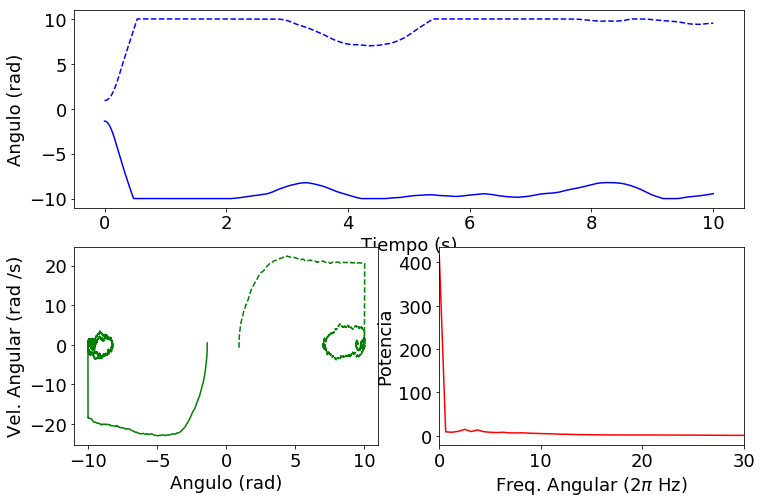

In [88]:
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1000
args_sol['omega'] = 0

y = m_rungekutta4(pendulo6, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)

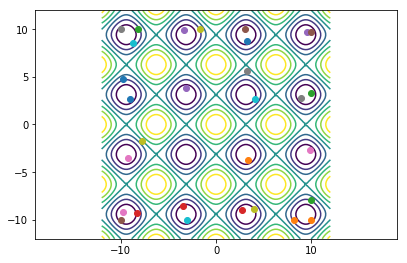

In [89]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-12,12))
ax.set_ylim((-12,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-12,12,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate
line20, = ax.plot([], [],'r')
(xx,yy)=meshgrid(theta,theta)
ax.contour(xx,yy,cos(xx)+cos(yy)) 
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()
plt.axis('equal')
plt.axis([-12, 12, -12, 12])
# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])

    
    '''
    x20 =  theta
    y20 =  cos(theta)
    line20.set_data(x20, y20)
    '''

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('test_ref_Evol2d_noise_inter_gauss.gif', writer='imagemagick', fps=24)

In [154]:
xdata=(y[:,:M]).flatten()
vxdata=(y[:,M:2*M]).flatten()
ydata=(y[:,2*M:3*M]).flatten()
vydata=(y[:,3*M:4*M]).flatten()



(array([  932.,  1313.,  1077.,  1418.,   825.,   408.,  1856.,  4037.,
         2400.,  2459.,  2479.,  2708.,  2245.,  4019.,  3975.,  2584.,
         1619.,  1257.,  1206.,  1203.]),
 array([-11.1917365 ,  -9.63218084,  -8.07262519,  -6.51306954,
         -4.95351388,  -3.39395823,  -1.83440258,  -0.27484693,
          1.28470873,   2.84426438,   4.40382003,   5.96337569,
          7.52293134,   9.08248699,  10.64204265,  12.2015983 ,
         13.76115395,  15.3207096 ,  16.88026526,  18.43982091,  19.99937656]),
 <a list of 20 Patch objects>)

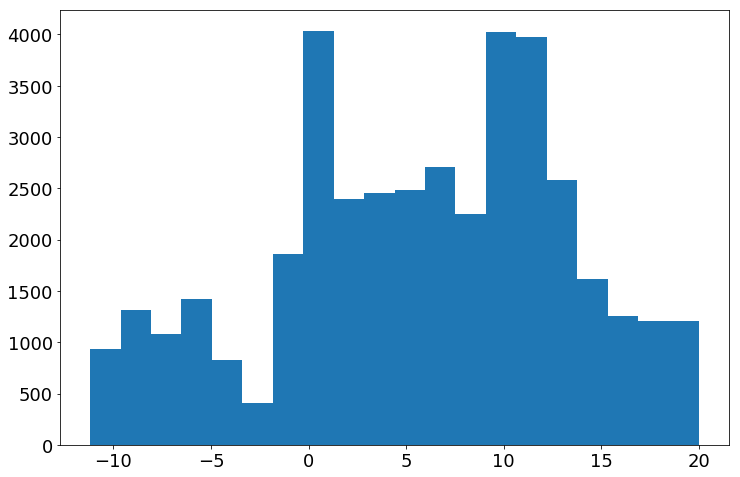

In [155]:
np.histogram(vxdata)
hist(vxdata, bins=20)

# Now we want to implement Periodic boundary conditions

In [138]:

def forceXper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def forceYper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -sin((w1-w2))

def force2Xper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    signs_X=[np.sign(y1-y2),np.sign(y1-y2+LX),np.sign(y1-y2-LX)]
    delta_X=min([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])
    delta_Y=min([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])
    #the scale factor is handled as if it was uniform among all agents
    return signs_X[np.argmin([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])]*(delta_X/rangei)*exp(-0.5*(delta_X/rangei)**2-0.5*(delta_Y/rangei)**2)

def force2Yper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    signs_Y=[np.sign(w1-w2),np.sign(w1-w2+LX),np.sign(w1-w2-LX)]
    delta_X=min([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])
    delta_Y=min([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])
    #the scale factor is handled as if it was uniform among all agents
    return signs_Y[np.argmin([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])]*(delta_Y/rangei)*exp(-0.5*(delta_X/rangei)**2-0.5*(delta_Y/rangei)**2)


def force3Xper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    delta_X=min([y1-y2,y1-y2+LX,y1-y2-LX])
    delta_Y=min([w1-w2,w1-w2+LY,w1-w2-LY])
    #the scale factor is handled as if it was uniform among all agents
    return (delta_X)/((delta_Y)**2+(delta_X)**2)

def force3Yper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    delta_X=min([y1-y2,y1-y2+LX,y1-y2-LX])
    delta_Y=min([w1-w2,w1-w2+LY,w1-w2-LY])
    #the scale factor is handled as if it was uniform among all agents
    return (delta_Y)/((delta_Y)**2+(delta_X)**2)


def pairFXper(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Xper(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFYper(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Yper(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return sin(yi)

def extFY(yi,wi,t):
    return sin(wi)

In [139]:
def m_rungekutta4per(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    for i in range(1,len(y)):
        
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
        
        y[i][:2*M:2]=y[i][:2*M:2]%(LXf-LX0)
        y[i][2*M:4*M:2]=y[i][2*M:4*M:2]%(LYf-LY0)
    return(y)

In [147]:
M=20
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


h = t[1]-t[0]
LX0=-10
LXf=10
LY0=-10
LYf=10
LX=LXf-LX0
LY=LYf-LY0
N=2000


X_loc=10
X_scale=.5
VX_loc=0
VX_scale=1
Y_loc=10
Y_scale=.5
VY_loc=0
VY_scale=1

t = linspace(0., 10., N+1) # [s] arreglo de n_puntos en el tiempo

#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)

In [148]:
def pendulo7(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        dydt[i+1] = args['alpha']*pairFXper(i,y,t) + args['omega']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        dydt[i+1+2*M] = args['alpha']*pairFYper(i,y,t) + args['omega']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 

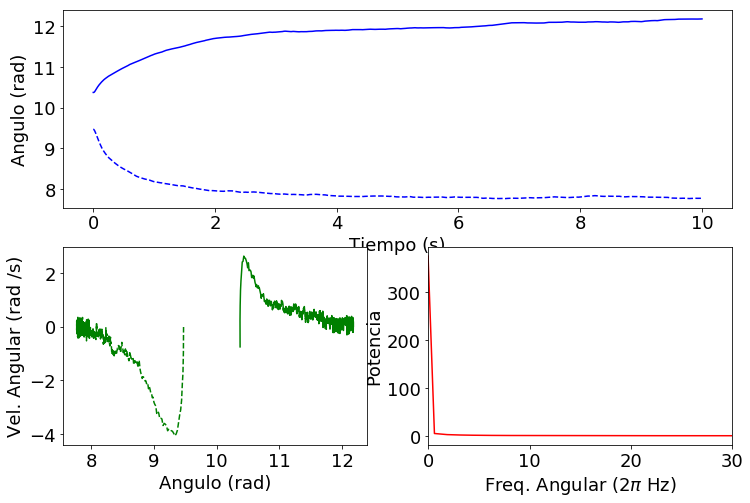

In [164]:
args_sol['alpha'] = 50
args_sol['beta'] = 50
args_sol['gamma'] = 500
args_sol['omega'] = 0

y = m_rungekutta4per(pendulo7, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)

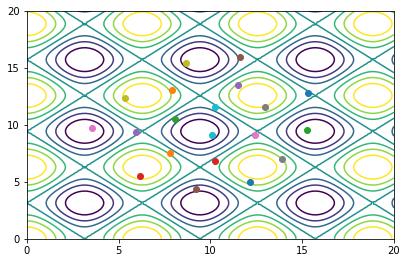

In [165]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-0,20))
ax.set_ylim((-0,20))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-0,20,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate
line20, = ax.plot([], [],'r')
(xx,yy)=meshgrid(theta,theta)
ax.contour(xx,yy,cos(xx)+cos(yy)) 
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()

# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])

    
    '''
    x20 =  theta
    y20 =  cos(theta)
    line20.set_data(x20, y20)
    '''

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('per_Evol2d_noise_inter_gauss.gif', writer='imagemagick', fps=24)

In [158]:
xdata=(y[:,:M]).flatten()
vxdata=(y[:,M:2*M]).flatten()
ydata=(y[:,2*M:3*M]).flatten()
vydata=(y[:,3*M:4*M]).flatten()


In [159]:
np.histogram(vxdata)

(array([  692,   931,  1742,  2296, 24199,  4454,  2325,  1142,  1362,   877]),
 array([-135.62835131, -102.80375499,  -69.97915867,  -37.15456235,
          -4.32996603,   28.49463029,   61.31922661,   94.14382293,
         126.96841925,  159.79301557,  192.61761189]))

(array([   37.,    43.,   185.,  1253.,  1303.,  1276.,  1447.,  1586.,
         1795.,  1738.,  1566.,  1968.,  1240.,  1167.,  1205.,  1067.,
          853.,   207.,    46.,    28.]),
 array([-14.49932927, -13.05288795, -11.60644663, -10.1600053 ,
         -8.71356398,  -7.26712266,  -5.82068134,  -4.37424002,
         -2.9277987 ,  -1.48135738,  -0.03491606,   1.41152526,
          2.85796658,   4.3044079 ,   5.75084923,   7.19729055,
          8.64373187,  10.09017319,  11.53661451,  12.98305583,  14.42949715]),
 <a list of 20 Patch objects>)

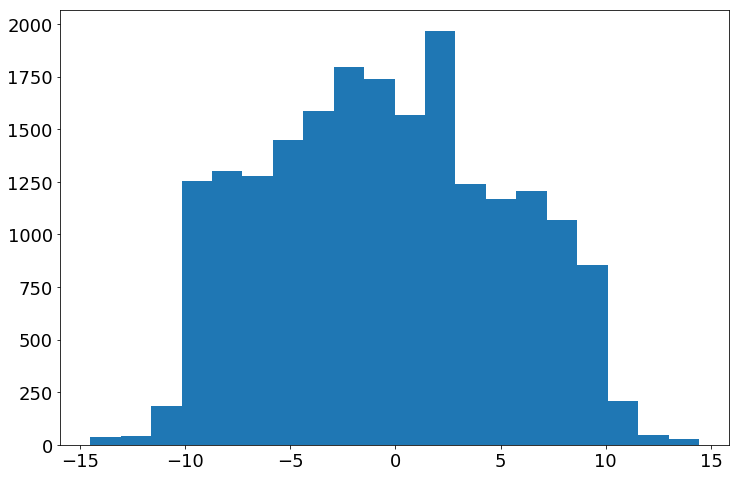

In [223]:
hist(vxdata, bins=20)

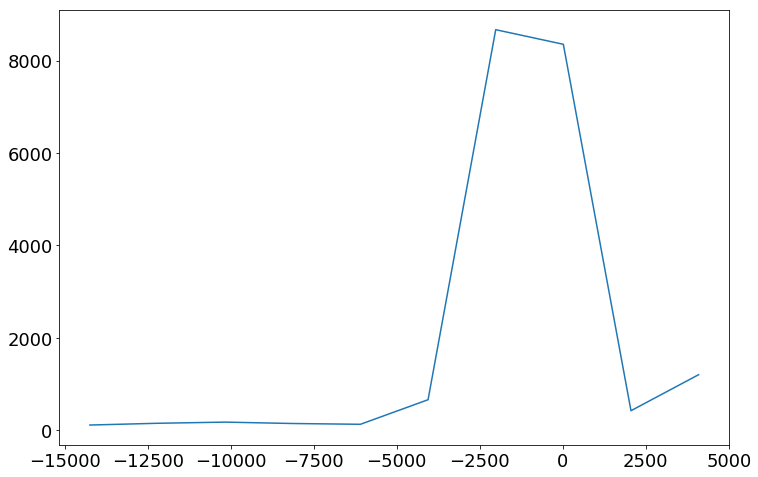

In [163]:
plot( array([-14246.48552755, -12208.76427325, -10171.04301895,  -8133.32176464,
        -6095.60051034,  -4057.87925604,  -2020.15800173,     17.56325257,
         2055.28450687,   4093.00576118]),array([ 111,  149,  174,  144,  127,  659, 8670, 8354,  421, 1201]))

# Test  1

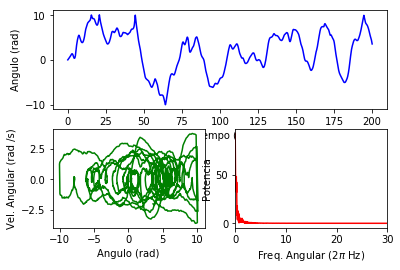

x (array([ 2370,  1988,  3290,  5163, 23447, 20293,  6271,  5615,  5677,  5906]), array([-10.12556352,  -8.07691327,  -6.02826303,  -3.97961278,
        -1.93096253,   0.11768771,   2.16633796,   4.2149882 ,
         6.26363845,   8.3122887 ,  10.36093894]))
vx (array([ 3324,  2989,  2965,  5370, 21299, 21476,  6660,  4035,  4679,  7223]), array([-10.26785689,  -8.22653841,  -6.18521994,  -4.14390146,
        -2.10258299,  -0.06126451,   1.98005396,   4.02137244,
         6.06269091,   8.10400939,  10.14532786]))
y (array([ 3240,  2587,  3075,  4800, 21633, 21894,  5556,  4584,  4836,  7815]), array([-10.17691885,  -8.14635973,  -6.1158006 ,  -4.08524148,
        -2.05468236,  -0.02412324,   2.00643588,   4.036995  ,
         6.06755412,   8.09811324,  10.12867237]))
vy (array([ 2658,  2724,  3646,  4927, 22565, 22039,  6041,  4707,  4911,  5802]), array([-10.10899497,  -8.08132038,  -6.05364578,  -4.02597119,
        -1.99829659,   0.029378  ,   2.0570526 ,   4.08472719,
         6.11

In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.fftpack as fft

def m_rungekutta4(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    for i in range(1,len(y)):
  
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
    return(y)

def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/np.sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:int(N/2)]*2*np.pi, abs(y_fft[:int(N/2)]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')


####################
# Condiciones Iniciales
# angulos pequeños
M=20
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


X_loc=0
X_scale=2
VX_loc=0
VX_scale=2
Y_loc=0
Y_scale=2
VY_loc=0
VY_scale=2
#Positions
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)


g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 4000 # n_puntos
t = np.linspace(0., 200., N+1) # [s] arreglo de n_puntos en el tiempo



h = t[1]-t[0]
LX0=-10
LXf=10
LY0=-10
LYf=10
LX=LXf-LX0
LY=LYf-LY0

# definir los argumentos
args_sol = {}
'''
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = freq_ext
'''
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1000
args_sol['omega'] = 0

############################


############################


def forceX(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return np.sin((y1-y2))

def forceY(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -np.sin((w1-w2))

def force2X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*np.exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 

def force2Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((w1-w2)/rangei)*np.exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 


def force3X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (y1-y2)/((y1-y2)**2+(w1-w2)**2)

def force3Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (w1-w2)/((y1-y2)**2+(w1-w2)**2)


def pairFX(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2X(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFY(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Y(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return np.sin(yi-t)

def extFY(yi,wi,t):
    return np.sin(wi-t)

####################

# Condiciones Iniciales
# angulos pequeños

def pendulo6(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        if(y[i]>LXf):
            y[i+1] = -abs(y[i+1]) 
        if(y[i]<LX0):
            y[i+1] = abs(y[i+1]) 
        
        dydt[i+1] = args['alpha']*pairFX(i,y,t) + args['omega']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        
        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        if(y[i+2*M]<LY0):
            y[i+1+2*M] = abs(y[i+1+2*M])
        if(y[i+2*M]>LYf):
            y[i+1+2*M] = -abs(y[i+1+2*M])
        
        dydt[i+1+2*M] = args['alpha']*pairFY(i,y,t) + args['omega']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 




args_sol['alpha'] = 10
args_sol['beta'] = 0.1
args_sol['gamma'] = 10
args_sol['omega'] =  1


y = m_rungekutta4(pendulo6, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)
plt.show()


xdata=(y[:,:M]).flatten()
vxdata=(y[:,M:2*M]).flatten()
ydata=(y[:,2*M:3*M]).flatten()
vydata=(y[:,3*M:4*M]).flatten()

print("x",np.histogram(xdata))
print("vx",np.histogram(vxdata))
print("y",np.histogram(ydata))
print("vy",np.histogram(vydata))

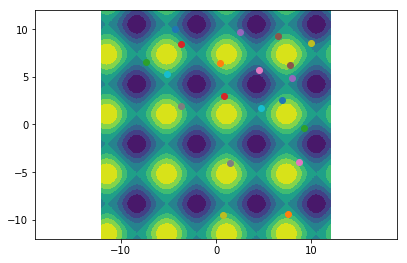

In [5]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-12,12))
ax.set_ylim((-12,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-12,12,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate

(xx,yy)=meshgrid(theta,theta)
#ax.contour(xx,yy,(xx)**2+(yy)**2) 
#ax.contour(xx,yy,cos(xx)+cos(yy))
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()
plt.axis('equal')
plt.axis([-12, 12, -12, 12])
# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])
    ax.set_xlim((-12,12))
    ax.set_ylim((-12,12))
    ax.contourf(xx,yy,cos(xx-t[i])+cos(yy-t[i]))
    

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('test_ref.gif', writer='imagemagick', fps=24)

(array([  1154.,   1216.,    963.,   1025.,   1598.,   1692.,   1809.,
          3354.,   9533.,  13914.,  12513.,   7780.,   3667.,   2604.,
          2658.,   2957.,   2860.,   2817.,   2974.,   2932.]),
 array([-10.12556352,  -9.10123839,  -8.07691327,  -7.05258815,
         -6.02826303,  -5.0039379 ,  -3.97961278,  -2.95528766,
         -1.93096253,  -0.90663741,   0.11768771,   1.14201283,
          2.16633796,   3.19066308,   4.2149882 ,   5.23931333,
          6.26363845,   7.28796357,   8.3122887 ,   9.33661382,  10.36093894]),
 <a list of 20 Patch objects>)

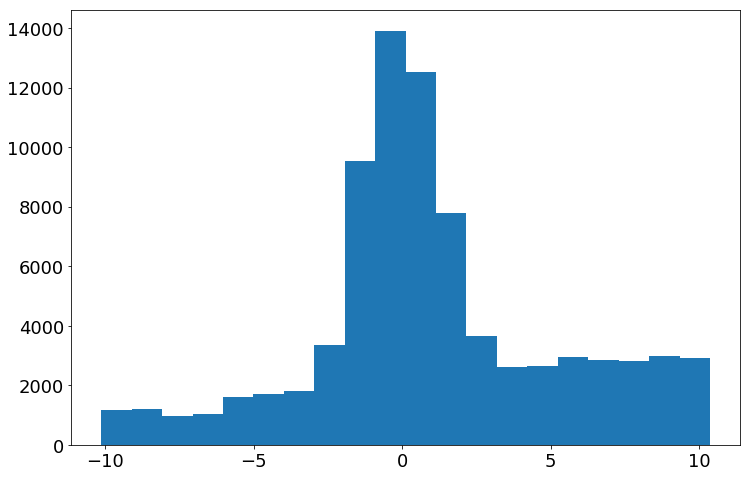

In [6]:
hist(xdata, bins=20)

In [7]:
xedges = arange(LX0,LXf,1)
yedges = arange(LY0,LYf,1)
H, xedges, yedges = np.histogram2d(y[:,0:2*M:2].flatten(), y[:,2*M:4*M:2].flatten(),bins=(xedges, yedges))
H = H.T 
 # Let each row list bins with common y range.

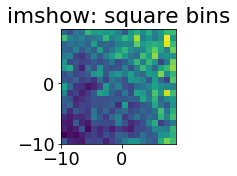

In [8]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H, interpolation='nearest', origin='low',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [9]:
50*4*10000

2000000

# Tes Per

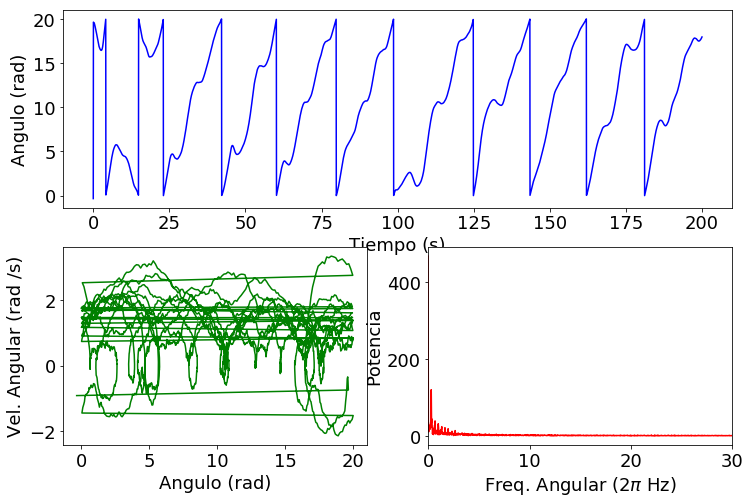

x (array([   80,  1576, 17536,  4777,  2955,  2745,  2443,  2582,  2621,  2695]), array([ -5.82802911,  -3.24545352,  -0.66287793,   1.91969765,
         4.50227324,   7.08484883,   9.66742442,  12.25      ,
        14.83257559,  17.41515118,  19.99772676]))
vx (array([  324,  3474, 17773,  2536,  2996,  2413,  2339,  2703,  2486,  2966]), array([ -4.96915448,  -2.47226516,   0.02462416,   2.52151348,
         5.0184028 ,   7.51529211,  10.01218143,  12.50907075,
        15.00596007,  17.50284939,  19.99973871]))
y (array([  161,  3657, 17668,  2817,  3432,  2590,  2209,  2510,  2413,  2553]), array([ -4.88336661,  -2.3950467 ,   0.0932732 ,   2.58159311,
         5.06991302,   7.55823293,  10.04655283,  12.53487274,
        15.02319265,  17.51151256,  19.99983246]))
vy (array([  301,  8444, 13362,  2402,  3007,  2262,  2472,  2782,  2597,  2381]), array([ -4.10249521,  -1.69238567,   0.71772388,   3.12783343,
         5.53794297,   7.94805252,  10.35816207,  12.76827161,
        15.17

In [10]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.fftpack as fft

def m_rungekutta4per(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    for i in range(1,len(y)):
        
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
        
        y[i][:2*M:2]=y[i][:2*M:2]%(LXf-LX0)
        y[i][2*M:4*M:2]=y[i][2*M:4*M:2]%(LYf-LY0)
    return(y)

def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/np.sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:int(N/2)]*2*np.pi, abs(y_fft[:int(N/2)]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')


####################
# Condiciones Iniciales
# angulos pequeños
M=10
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


X_loc=0
X_scale=2
VX_loc=0
VX_scale=2
Y_loc=0
Y_scale=2
VY_loc=0
VY_scale=2
#Positions
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)


g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 4000 # n_puntos
t = np.linspace(0., 200., N+1) # [s] arreglo de n_puntos en el tiempo



h = t[1]-t[0]
LX0=-10
LXf=10
LY0=-10
LYf=10
LX=LXf-LX0
LY=LYf-LY0

# definir los argumentos
args_sol = {}
'''
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = freq_ext
'''
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1000
args_sol['omega'] = 0

############################


############################


def forceXper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return sin((y1-y2))

def forceYper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -sin((w1-w2))

def force2Xper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    signs_X=[np.sign(y1-y2),np.sign(y1-y2+LX),np.sign(y1-y2-LX)]
    delta_X=min([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])
    delta_Y=min([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])
    #the scale factor is handled as if it was uniform among all agents
    return signs_X[np.argmin([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])]*(delta_X/rangei)*exp(-0.5*(delta_X/rangei)**2-0.5*(delta_Y/rangei)**2)

def force2Yper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    signs_Y=[np.sign(w1-w2),np.sign(w1-w2+LX),np.sign(w1-w2-LX)]
    delta_X=min([abs(y1-y2),abs(y1-y2+LX),abs(y1-y2-LX)])
    delta_Y=min([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])
    #the scale factor is handled as if it was uniform among all agents
    return signs_Y[np.argmin([abs(w1-w2),abs(w1-w2+LY),abs(w1-w2-LY)])]*(delta_Y/rangei)*exp(-0.5*(delta_X/rangei)**2-0.5*(delta_Y/rangei)**2)


def force3Xper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    delta_X=min([y1-y2,y1-y2+LX,y1-y2-LX])
    delta_Y=min([w1-w2,w1-w2+LY,w1-w2-LY])
    #the scale factor is handled as if it was uniform among all agents
    return (delta_X)/((delta_Y)**2+(delta_X)**2)

def force3Yper(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    delta_X=min([y1-y2,y1-y2+LX,y1-y2-LX])
    delta_Y=min([w1-w2,w1-w2+LY,w1-w2-LY])
    #the scale factor is handled as if it was uniform among all agents
    return (delta_Y)/((delta_Y)**2+(delta_X)**2)


def pairFXper(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Xper(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFYper(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Yper(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F
        
def extFX(yi,wi,t):
    return np.sin(yi-t)

def extFY(yi,wi,t):
    return np.sin(wi-t)

####################

# Condiciones Iniciales
# angulos pequeños

def pendulo7(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación
        dydt[i+1] = args['alpha']*pairFXper(i,y,t) + args['omega']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        dydt[i+2*M] = y[i+1+2*M] #primera ecuación
        dydt[i+1+2*M] = args['alpha']*pairFYper(i,y,t) + args['omega']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 




args_sol['alpha'] = 10
args_sol['beta'] = 0.1
args_sol['gamma'] = 10
args_sol['omega'] =  1


y = m_rungekutta4per(pendulo7, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)
plt.show()


xdata=(y[:,:M]).flatten()
vxdata=(y[:,M:2*M]).flatten()
ydata=(y[:,2*M:3*M]).flatten()
vydata=(y[:,3*M:4*M]).flatten()

print("x",np.histogram(xdata))
print("vx",np.histogram(vxdata))
print("y",np.histogram(ydata))
print("vy",np.histogram(vydata))

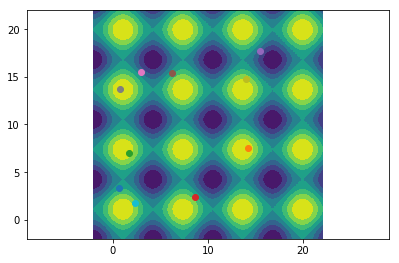

In [15]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
rc('animation', html='html5')
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((-12,12))
ax.set_ylim((-12,12))
#ax.set_ylabel("$2E$ (a.u.)",size=37)
#ax.set_xlabel("$x$ (a.u.)",size=37)
pylab.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams.update({'font.size': 18})
                                               

theta=linspace(-2,22,100)

lines = [plt.plot([], [],'o')[0] for _ in range(M)] #lines to animate

(xx,yy)=meshgrid(theta,theta)
#ax.contour(xx,yy,(xx)**2+(yy)**2) 
#ax.contour(xx,yy,cos(xx)+cos(yy))
#ax.imshow(cos(xx)+cos(yy))
ax.autoscale(False)
plt.tight_layout()
plt.axis('equal')
plt.axis([-2, 22, -2, 22])
# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
    return lines
# animation function. This is called sequentially
def animate2(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line10,)


def animate(i):
    
    for j,line in enumerate(lines):
        line.set_data(y[5*i,2*j], y[5*i,2*j+2*M])
    ax.set_xlim((-2,22))
    ax.set_ylim((-2,22))
    ax.contourf(xx,yy,cos(xx-t[i])+cos(yy-t[i]))
    

    return(lines)
# call the animator. blit=True means only re-draw the parts that have changed.

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=400, interval=1, blit=True,repeat_delay=1)
anim.save('test_ref_per.gif', writer='imagemagick', fps=24)

(array([    48.,     32.,    180.,   1396.,   6503.,  11033.,   3456.,
          1321.,   1750.,   1205.,   1430.,   1315.,   1333.,   1110.,
          1247.,   1335.,   1276.,   1345.,   1489.,   1206.]),
 array([ -5.82802911,  -4.53674131,  -3.24545352,  -1.95416573,
         -0.66287793,   0.62840986,   1.91969765,   3.21098545,
          4.50227324,   5.79356103,   7.08484883,   8.37613662,
          9.66742442,  10.95871221,  12.25      ,  13.5412878 ,
         14.83257559,  16.12386338,  17.41515118,  18.70643897,  19.99772676]),
 <a list of 20 Patch objects>)

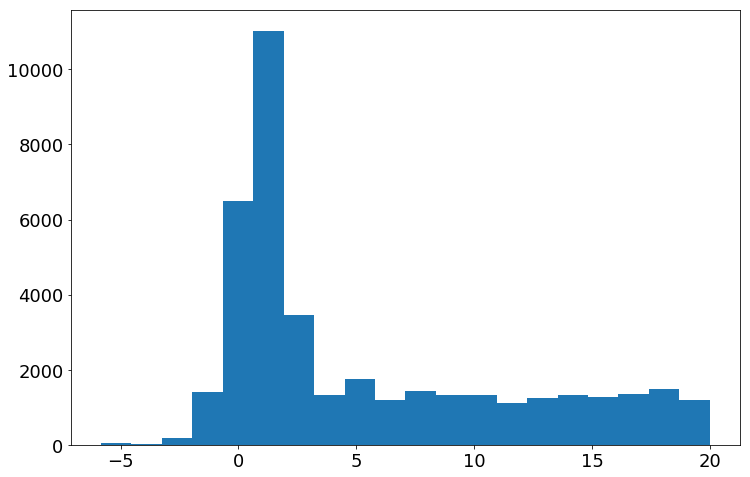

In [21]:
plt.hist(xdata, bins=20)

In [19]:
xedges = arange(0,20,1)
yedges = arange(0,20,1)
H, xedges, yedges = np.histogram2d(y[:,0:2*M:2].flatten(), y[:,2*M:4*M:2].flatten(),bins=(xedges, yedges))
H = H.T 
 # Let each row list bins with common y range.

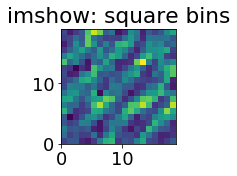

In [20]:
fig = plt.figure(figsize=(7, 3))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(H, interpolation='nearest', origin='low',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

# ENERGY CALCULATIONS NON_PERIODIC


376.028677073
371.333048689
364.624536489
354.40369706
341.860271057
327.938693826
314.017623384
302.56321871
292.085494172
282.233760474
273.516709333
265.147130361
258.517792921
250.993528646
244.104798233
236.627652449
230.947159226
225.806740837
221.850896239
217.186684386
212.959889217
210.978228595
208.481062073
206.872736855
206.264376621
205.278831331
205.621196062
202.960150145
201.111553807
199.605543452
198.276429753
197.835947547
195.78149069
194.807273944
192.806954359
192.042683268
190.831986048
188.510820411
185.888791166
184.291767402
182.727570556
181.186108436
176.806409115
174.531533498
172.424850921
169.429611067
167.913191557
165.460501797
162.410566553
162.078460397
163.278502274
162.545143148
159.459753615
160.224823582
158.544935024
159.007862312
159.137597932
158.992932097
158.781867377
158.479826937
158.382387082
158.650443988
161.378775402
160.675621577
161.066750181
161.154296128
161.205158205
157.709041062
153.834589488
150.065956041
148.023084425
143.47034

28.0652067342
27.6485223841
26.7973692522
25.748534632
24.3827836489
23.6771150916
23.0420434295
22.8360851435
22.7517486934
22.0080124311
21.3940788412
20.6117160751
20.66025666
19.9647285911
19.1303085455
18.654271303
19.0186482153
19.3802871341
19.3030025989
19.2679881752
19.6460278873
20.0526045923
19.8219671564
20.2171446225
20.9399368244
21.2035095385
21.8159511898
21.6401194979
21.8097790282
21.9080264608
21.9566052882
22.5858612003
22.6645010832
23.2329316805
23.0441405306
23.2567719784
23.6633368789
23.4449278351
24.0755848733
24.15431519
24.4246785882
25.2924255283
25.6117245838
25.1648623063
26.1043562196
27.3135121619
28.0112114306
28.3633751159
28.70523161
28.2665165171
28.2975879587
28.5121290361
27.8500685453
27.7387040274
27.5973292293
27.9648736487
27.459093777
28.0668806327
28.3595960562
28.6821922895
28.6652155401
28.1775642417
27.8181084513
27.8851121731
28.1490786267
27.4489066911
27.2862294339
27.606493674
28.3047180238
28.2635119119
28.7001123865
28.4716648332
28

41.2889584682
40.5553872587
39.5920269921
38.7918591653
37.9194869289
36.7394697677
35.0795982736
34.2189266538
33.5607446079
33.8070172856
33.3258740003
33.7390080872
34.1597873269
34.0828752282
34.4514137476
34.3812985424
34.6184861984
34.5513096701
34.7702334764
34.2851671593
33.8296713558
33.7957920014
32.700694552
32.0130699918
31.9888516269
31.4890405919
31.519171418
32.3663469818
32.1429853541
32.2075451514
32.2391011718
31.4296165678
31.2460835257
30.5631917437
30.7740783934
30.1848484527
30.368149806
30.8815620451
31.4989965004
32.393484998
32.7231143154
32.9336667131
32.8999697714
33.6776873522
34.2546331324
35.0196989302
35.7632682052
35.8800943768
37.3280907847
38.0240956879
38.5840658043
39.5908550839
40.3183832964
41.2854038995
41.3442028317
41.2297322412
41.0144285462
41.0859837781
40.2163085763
39.5714889213
39.5347651911
39.5418509579
38.9006994667
39.652929605
40.7592260146
40.7643632055
42.1786661832
44.2265831513
45.5089784287
46.6227040399
48.5467708322
50.69561065

30.8523155536
30.6530045149
30.0397398689
29.6024953576
29.549031759
29.3514864568
30.0486069524
31.2013049383
31.4125688644
31.3989344774
31.3697389444
31.1246615411
30.5230062464
30.4949742309
30.1328761021
30.4287029348
29.6371968365
28.5119730037
28.191402587
28.3064685907
28.5477061059
28.6108503904
29.1623548748
29.1668986833
29.1952389424
28.291418031
27.6742224102
27.2271046337
28.234584571
28.1012601845
28.0819240396
28.3476588452
27.9256108013
27.5987129058
27.4409865887
27.294275834
27.2428578449
26.6031562124
27.4818723285
27.5121565394
28.4707650435
28.8115992874
28.8676185996
28.8675903825
29.6116833687
30.3442655693
31.1094995289
32.055091034
33.4527057579
33.6937663771
35.1276557672
35.5290743502
35.1178119124
36.5054525754
36.5248962912
36.8119595599
36.6032083317
36.9488220102
37.8205035792
38.1698486207
38.3827419622
38.6397898899
39.016520274
38.2644773745
38.7135910852
38.8821931997
38.8606665201
40.0856780603
39.9359184277
39.2302901512
39.9389886071
40.5989876513

29.1227307423
29.2211203365
29.0933463438
28.2332421706
27.5058243323
27.5447336404
26.9342663953
26.8173373326
26.7355611348
26.4133454334
25.9869796905
25.9555010697
25.4236740373
25.0399158079
24.6913207632
24.5577055496
24.4004886383
23.7626150379
23.0897940916
23.62423255
23.421758248
22.9150327278
22.4715008118
21.9500124906
21.9387720974
21.7592502776
22.389382872
23.1183622009
22.4919247415
22.5263555458
23.1798359768
23.9078058498
24.9138068496
25.6669360455
26.4487022821
26.9614197091
27.5893894102
28.1181388737
29.0906429983
29.6016572003
29.69655983
29.3378973266
29.6882789178
28.9481384289
28.0800597762
26.7873716872
25.5711988849
25.1478382797
24.3338173618
23.0510607884
22.6152212142
22.1295489484
21.805888411
21.4515907911
21.9161719623
21.5577498883
21.73631644
22.0197988788
22.6115078439
21.5547968634
21.5104505684
21.6310882607
21.9080761211
22.258929702
22.072053555
22.4647646444
23.3672140966
23.81414352
24.1669588556
25.6522826074
26.5446032773
27.5052993775
28.85

30.5984732424
30.5798207657
30.6221619713
30.0816136072
29.9113305628
30.0157664188
29.7821436782
30.1714741819
30.7234436375
30.6576152049
31.0728275516
30.9976731085
30.5972194642
30.0265975408
30.114386317
30.4623068218
30.8148904403
30.8394641197
31.6879133995
32.3534089249
32.1196069184
32.0483416939
31.9108820834
32.7759118322
32.2623113885
31.9601011999
32.0208674885
32.278842299
32.5190917021
32.8109221698
32.6734726817
32.8297988111
32.7460121524
32.8644323715


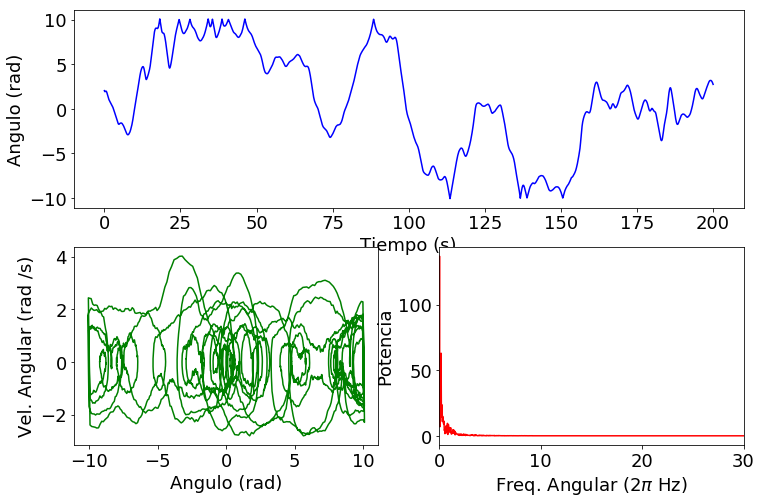

x (array([ 3788,  3712,  3550,  5863, 22518, 21588,  6170,  4365,  4033,  4433]), array([-10.15622105,  -8.12740448,  -6.09858791,  -4.06977134,
        -2.04095477,  -0.01213819,   2.01667838,   4.04549495,
         6.07431152,   8.10312809,  10.13194466]))
vx (array([ 1945,  1987,  3162,  4966, 22754, 21317,  5680,  4440,  5843,  7926]), array([-10.12040043,  -8.08329823,  -6.04619603,  -4.00909384,
        -1.97199164,   0.06511056,   2.10221276,   4.13931496,
         6.17641716,   8.21351936,  10.25062155]))
y (array([ 3444,  3619,  3283,  5648, 21801, 22372,  6407,  5026,  4095,  4325]), array([-10.1517438 ,  -8.11927373,  -6.08680366,  -4.05433359,
        -2.02186352,   0.01060655,   2.04307662,   4.07554669,
         6.10801676,   8.14048683,  10.1729569 ]))
vy (array([ 1916,  2189,  2851,  4983, 21898, 21007,  5838,  4825,  5639,  8874]), array([ -1.01859421e+01,  -8.14964279e+00,  -6.11334345e+00,
        -4.07704411e+00,  -2.04074477e+00,  -4.44543498e-03,
         2.031853

In [34]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import scipy.fftpack as fft

def m_rungekutta4(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    y[0] = y_0
    h = t[1]-t[0]
    
    
    for i in range(1,len(y)):
  
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
    return(y)

def m_rungekutta4_E(func, y_0, t, args={}):
    y = np.zeros([len(t), len(y_0)])
    Ene= np.zeros([len(t),1])
    y[0] = y_0
    h = t[1]-t[0]
    Ene[0] = Energy(t[0],y[0],args)
    
    for i in range(1,len(y)):
  
        k1 = func(t[i-1],y[i-1],args)
    
        #paso 1
        t1 = t[i-1] + (h/2.0)
        y1 = y[i-1] + (h/2.0) * k1
        k2 = func(t1, y1,args)
    
        #paso 2
        t2 = t[i-1] + (h/2.0)
        y2 = y[i-1] + (h/2.0) * k2
        k3 = func(t2, y2,args)
        
        #paso 3
        t3 = t[i-1] + h
        y3 = y[i-1] + (h * k3)
        k4 = func(t3, y3,args)
    
        #paso 4
        pendiente = (1.0/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    
        t[i] = t[i-1] + h
        y[i] = y[i-1] + h * pendiente
        Ene[i] = Energy(t[i],y[i],args)
    return(y,Ene)

def graficar_fase_pendulo(t,y):
    # Grafique el ángulo, diagrame de fase y FFT del péndulo
    
    fig = plt.figure()

    # Plot Angle
    ax_1 = fig.add_subplot(211)
    ax_1.plot(t, y[:,0], c='b')
    ax_1.set_xlabel('Tiempo (s)')
    ax_1.set_ylabel('Angulo (rad)')
    
    # Plot Phase Diagram
    ax_2 = fig.add_subplot(223)
    ax_2.plot(y[:,0], y[:,1], c='g')
    ax_2.set_xlabel('Angulo (rad)')
    ax_2.set_ylabel('Vel. Angular (rad /s)')
    
    # Calcule la transformada de fourier
    f_fft = fft.fftfreq(len(t), t[1]-t[0])
    y_fft = fft.fft(y[:,0])/np.sqrt(2*len(t))
    
    # Grafique el espectro de potencia (Transformada de Fourier)
    ax_3 = fig.add_subplot(224)
    ax_3.plot(f_fft[:int(N/2)]*2*np.pi, abs(y_fft[:int(N/2)]), c='r')
    ax_3.set_xlim([0, 30])
    ax_3.set_xlabel('Freq. Angular ($2 \pi$ Hz)')
    ax_3.set_ylabel('Potencia')


####################
# Condiciones Iniciales
# angulos pequeños
M=20
D=2 #2 dimensions
c_i_mult = np.zeros(D*2*M)


X_loc=0
X_scale=2
VX_loc=0
VX_scale=2
Y_loc=0
Y_scale=2
VY_loc=0
VY_scale=2
#Positions
#Positions

for i in range(0,2*M,2):
    c_i_mult[i]=np.random.normal(loc = X_loc, scale = X_scale)
for i in range(1,2*M,2):
    c_i_mult[i]=np.random.normal(loc = VX_loc, scale = VX_scale)
    
for i in range(2*M,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = Y_loc, scale = Y_scale)
for i in range(2*M+1,2*2*M,2):
    c_i_mult[i]=np.random.normal(loc = VY_loc, scale = VY_scale)


g = 10. # [m /s2]

l_pendulo = 1. # [m]
m_pendulo = 1. # [kg]
fr = 1. # [kg /m /s]

F_ext = 0. # [N]
freq_ext = 0. # [2π /s]

N = 4000 # n_puntos
t = np.linspace(0., 200., N+1) # [s] arreglo de n_puntos en el tiempo



h = t[1]-t[0]
LX0=-10
LXf=10
LY0=-10
LYf=10
LX=LXf-LX0
LY=LYf-LY0

# definir los argumentos
args_sol = {}
'''
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = F_ext/(m_pendulo*l_pendulo)
args_sol['omega'] = freq_ext
'''
args_sol['alpha'] = g/l_pendulo
args_sol['beta'] = fr/m_pendulo
args_sol['gamma'] = 1000
args_sol['omega'] = 0

############################


############################


def forceX(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return np.sin((y1-y2))

def forceY(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    #the scale factor is handled as if it was uniform among all agents
    return -np.sin((w1-w2))


def Potential2(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return np.exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 


def force2X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((y1-y2)/rangei)*np.exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 

def force2Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return ((w1-w2)/rangei)*np.exp(-0.5*((y1-y2)/rangei)**2-0.5*((w1-w2)/rangei)**2) 


def force3X(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (y1-y2)/((y1-y2)**2+(w1-w2)**2)

def force3Y(y1,y2,w1,w2,vy1,vy2,vw1,vw2,t):
    rangei=1
    #the scale factor is handled as if it was uniform among all agents
    return (w1-w2)/((y1-y2)**2+(w1-w2)**2)

def pairV(i,y,t):
    V=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        V+=Potential2(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return V


def pairFX(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2X(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def pairFY(i,y,t):
    F=0
    for j in ([l for l in range(0,i,2)]+[l for l in range(i+2,2*M-1,2)]):
        F+=force2Y(y[i],y[j],y[i+2*M],y[j+2*M],y[i+1],y[j+1],y[i+1+2*M],y[j+1+2*M],t)
    return F

def Vext(yi,wi,t):
    return cos(yi-t)+cos(wi-t)

def extFX(yi,wi,t):
    return np.sin(yi-t)

def extFY(yi,wi,t):
    return np.sin(wi-t)

####################

# Condiciones Iniciales
# angulos pequeños

def pendulo6(t,y,args):
    dydt = np.zeros(2*2*M)
    for i in range(0,2*M,2):
        dydt[i] = y[i+1] #primera ecuación coordenadas x, velocidades son indice impar
        if(y[i]>LXf):
            y[i+1] = -abs(y[i+1]) 
        if(y[i]<LX0):
            y[i+1] = abs(y[i+1]) 
        
        dydt[i+1] = args['alpha']*pairFX(i,y,t) + args['omega']*extFX(y[i],y[i+2*M],t) - args['beta']*y[i+1] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))

        
        dydt[i+2*M] = y[i+1+2*M] #primera ecuación coordenadas y, velocidades son indice par
        if(y[i+2*M]<LY0):
            y[i+1+2*M] = abs(y[i+1+2*M])
        if(y[i+2*M]>LYf):
            y[i+1+2*M] = -abs(y[i+1+2*M])
        
        dydt[i+1+2*M] = args['alpha']*pairFY(i,y,t) + args['omega']*extFY(y[i],y[i+2*M],t) - args['beta']*y[i+1+2*M] + args['gamma']*np.random.normal(loc = 0.0, scale = np.sqrt(h))


    return dydt 

def Energy(t,y,args):
    E=0
    for i in range(0,2*M,2):
        E += 0.5*y[i+1]*y[i+1] + 0.5*y[i+1+2*M]*y[i+1+2*M] #primera ecuación

        E += args['alpha']*pairV(i,y,t) + args['omega']*Vext(y[i],y[i+2*M],t)
 
    return E



args_sol['alpha'] = 10
args_sol['beta'] = 0.1
args_sol['gamma'] = 10
args_sol['omega'] =  1

#y = m_rungekutta4(pendulo6, c_i_mult, t, args_sol)
y,Ene = m_rungekutta4_E(pendulo6, c_i_mult, t, args_sol)
graficar_fase_pendulo(t,y)
plt.show()


xdata=(y[:,:M]).flatten()
vxdata=(y[:,M:2*M]).flatten()
ydata=(y[:,2*M:3*M]).flatten()
vydata=(y[:,3*M:4*M]).flatten()

print("x",np.histogram(xdata))
print("vx",np.histogram(vxdata))
print("y",np.histogram(ydata))
print("vy",np.histogram(vydata))

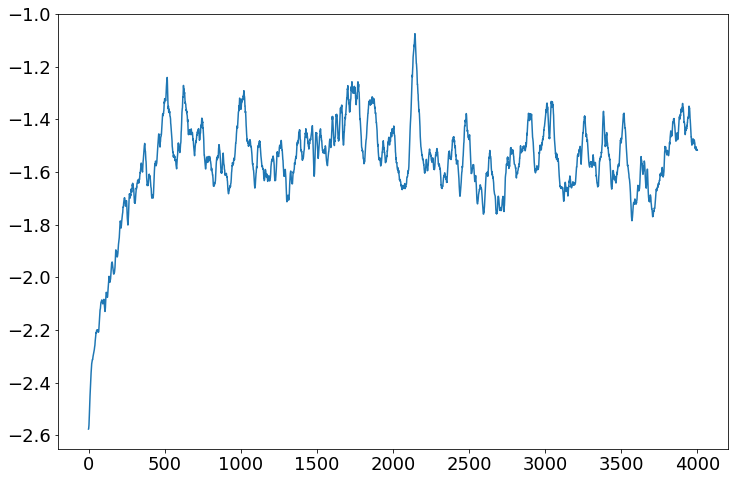

In [39]:
plot(-log10(Ene))